In [41]:
import pickle

In [42]:
import pandas as pd

In [43]:
marked_essays = pd.read_csv('files/marked_essays_v1.csv', header=1)
marked_essays

,essay id,Has the student written a compelling opening?,Has the student 'shown' and not 'told'?,Has the student used a range of literary devices?,Has the student made an effort to create dynamic characters?,Has the student established a sense of setting?,Has the student varied their sentence structure?,Has the student varied their sentence length?,Has the student written a story that follows the narrative arc?,Has the student engaged with the prompt?,Has the student included dialogue?,Has the student followed the rules of using dialogue? (1. speech marks 2. new speaker new line 3. punctuation before closing speech marks 4. speech tags).,Has the student used paragraphs?,Has the student used the five senses in their writing?
0,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3,3.0
1,2,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3,2.0
2,3,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2,0.0
3,4,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3,1.0
4,5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,0.0
75,76,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2,1.0
76,77,2.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,3.0,2.0,2,2.0
77,78,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,2.0,1.0,2,0.0


In [44]:
all_answers = pickle.load(open('answer_dump.pckl','rb'))

all_questions = pickle.load(open('questions_dump.pckl','rb'))

all_essays = pickle.load(open('essays_dump.pckl','rb'))


In [45]:
essay_str_list = [int(e[0][:-5][-2:]) for e in all_essays]

In [46]:
all_parsed_answers = []
for a in all_answers:
    essat_id = essay_str_list[a[0]]
    #print('hi', essat_id)
    #print(a[1],all_questions[a[1]])
    #print(marked_essays[marked_essays['essay id']==essat_id].iloc[0][1+a[1]], a[3]['choices'][0]['text'])
    all_parsed_answers.append((a[0],a[1],int(marked_essays[marked_essays['essay id']==essat_id].iloc[0][1+a[1]]), int(a[3]['choices'][0]['text'][:2])))
    #print(essat_id, marked_essays[marked_essays['essay id']==essat_id][0])
    #break

In [47]:
differences = [abs(a[-2]-a[-1]) for a in all_parsed_answers]

In [48]:
from matplotlib import pyplot as plt

(array([103.,   0.,   0., 217.,   0.,   0., 282.,   0.,   0.,  74.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

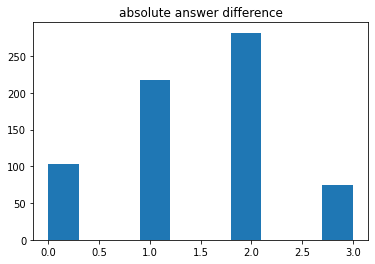

In [49]:
plt.title('absolute answer difference')
plt.hist(differences)

In [50]:
accumulated_variances_essays_list = {k:[] for k in range(52)}
for a in all_parsed_answers:
    accumulated_variances_essays_list[a[0]].append(abs(a[-2]-a[-1]))

In [51]:
import numpy as np

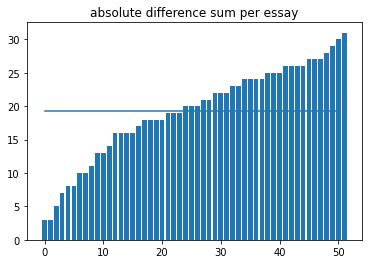

In [52]:
plt.title('absolute difference sum per essay')
plt.bar(list(range(52)), sorted([sum(a) for a in accumulated_variances_essays_list.values()]))
plt.plot([0,50],[np.average([sum(a) for a in accumulated_variances_essays_list.values()])]*2)

In [53]:
sorted_sum_list = sorted(enumerate([sum(a) for a in accumulated_variances_essays_list.values()]), key = lambda x: x[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14edee7dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14edef43a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14edee7af0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f14edef4940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14edef4c10>,
 'means': []}

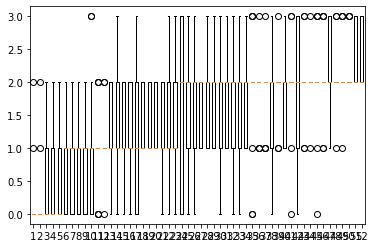

In [54]:
plt.boxplot([list(accumulated_variances_essays_list.values())[s[0]] for s in sorted_sum_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14edb92670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14edb92c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14edb924c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f14edb9f1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f14edb9f4c0>],
 'means': []}

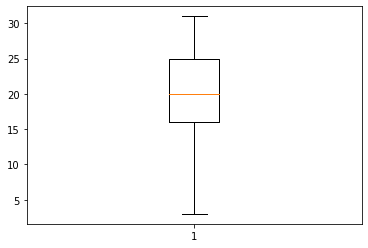

In [55]:
plt.boxplot([sum(s) for s in accumulated_variances_essays_list.values()])

In [56]:
current = -1 #questionid
accumulated_variances_list = {k:[] for k in range(13)}

for a in all_parsed_answers:
    accumulated_variances_list[a[1]].append(abs(a[-2]-a[-1]))

<BarContainer object of 13 artists>

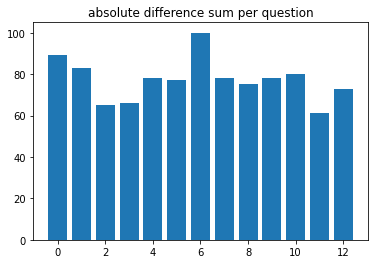

In [57]:
plt.title('absolute difference sum per question')
plt.bar(list(range(13)), [sum(accumulated_variances_list[k]) for k in accumulated_variances_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14edae7070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14edae7610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14edad7e80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f14edae7bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14edae7e80>,
 'means': []}

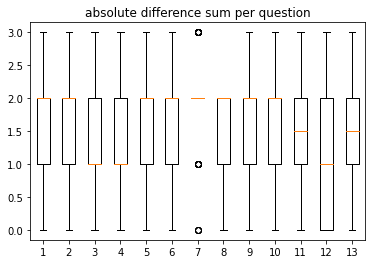

In [58]:
plt.title('absolute difference sum per question')
plt.boxplot([accumulated_variances_list[k] for k in accumulated_variances_list])